In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Salam sejahtera sekarang saya akan menganalisa sebuah topik yang cukup kontroversial, yaitu tentang bunuh diri. Saya akan mengambil dataset dari tahun 1985-2016 untuk menganalisa lebih lanjut. Mari kita mulai.


In [2]:
df = pd.read_csv('master.csv')

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
pd.set_option("display.max_rows", 101)

In [ ]:
Null banyak di bagian HDI for year, menurut saya kita tidak perlu khawatir terhadap itu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [70]:
import seaborn as sns; sns.set()

Saya ingin coba menganalisa ratio suicide/100k pop yang mengindikasikan seberapa rentan bunuh diri di sebuah negara. M

In [119]:
suicide_by_country=df['suicides/100k pop'].groupby(df['country']).mean().sort_values(ascending=False).head(10).reset_index()


In [ ]:
suicide_by_country

In [120]:
suicide_by_country.style.background_gradient()

,country,suicides/100k pop
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


In [84]:
suicide_by_generation=df['suicides/100k pop'].groupby(df.generation).mean().sort_values(ascending=False).reset_index()

In [85]:
suicide_by_generation.style.background_gradient()

,generation,suicides/100k pop
0,G.I. Generation,23.946378
1,Silent,18.418848
2,Boomers,14.742094
3,Generation X,10.556874
4,Millenials,5.383597
5,Generation Z,0.642299


In [76]:
suicide_by_year= df['suicides_no'].groupby(df.year).sum()

In [127]:
suicide_by_age_ratio=df['suicides/100k pop'].groupby(df.age).mean().sort_values(ascending=False).reset_index()

In [128]:
suicide_by_age_ratio.style.background_gradient()

,age,suicides/100k pop
0,75+ years,23.955409
1,55-74 years,16.155579
2,35-54 years,14.947441
3,25-34 years,12.186885
4,15-24 years,8.947154
5,5-14 years,0.620041


In [124]:
suicide_by_age=df['suicides_no'].groupby(df.age).sum().sort_values(ascending=False)

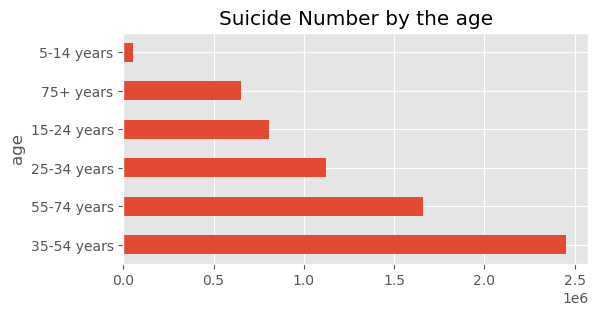

In [157]:
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
plt.title('Suicide Number by the age')
suicide_by_age.plot.barh()
plt.show()

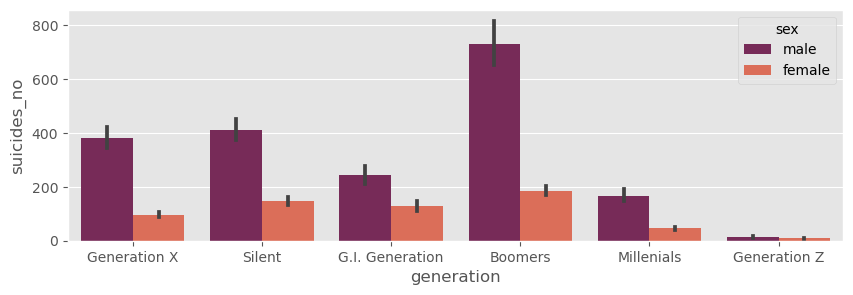

In [159]:
plt.figure(figsize=(10,3))
sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette="rocket")
plt.show()

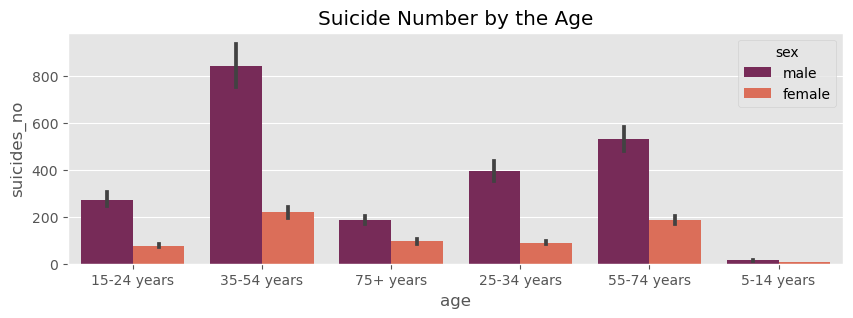

In [160]:
plt.figure(figsize=(10,3))
plt.title('Suicide Number by the Age')
sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette="rocket")
plt.show()

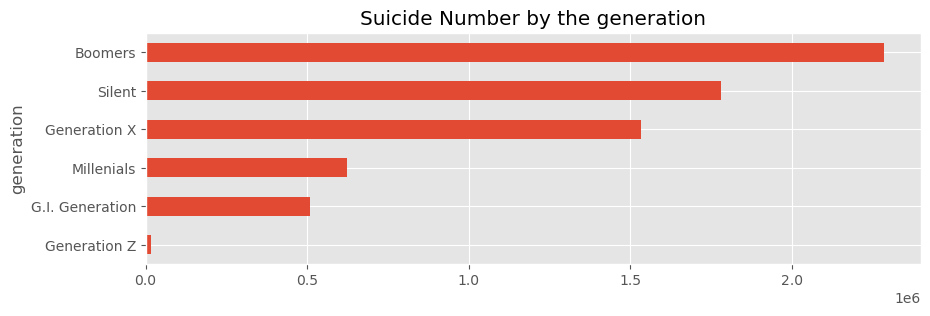

In [162]:
plt.style.use('ggplot')
plt.figure(figsize=(10,3))
plt.title('Suicide Number by the generation')
df['suicides_no'].groupby(df.generation).sum().sort_values().plot.barh()
plt.show()

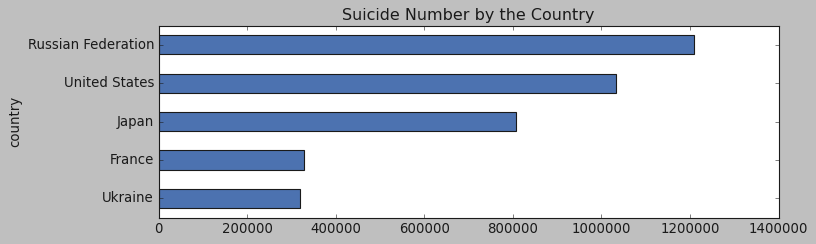

In [163]:
plt.style.use('classic')
plt.figure(figsize=(10,3))
plt.title('Suicide Number by the Country')
df['suicides_no'].groupby(df.country).sum().sort_values().tail().plot.barh()
plt.show()

In [ ]:
## Mean suicides number by gender and 100k population
df["year"] = pd.to_datetime(df["year"], format = "%Y")
data = df.groupby(["year", "sex"]).agg("mean").reset_index()

In [ ]:
data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)

In [ ]:
df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)

In [ ]:
df.groupby(['country', 'year'])[['suicides/100k pop']].sum().reset_index()

In [ ]:
df = df.groupby(["year", "sex", "age"]).agg("mean").reset_index()

In [152]:
total_suicide_year=df['suicides_no'].groupby(df.year).sum()

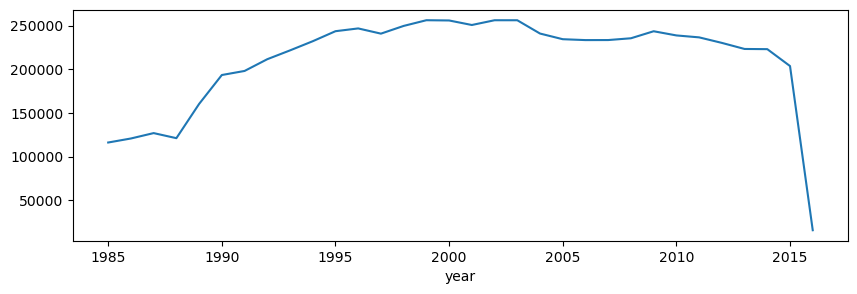

In [164]:
plt.style.use('default')
plt.figure(figsize=(10,3))
total_suicide_year.plot(x='year',y='suicides_no')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number: continue
   
    df[column]= df[column].astype(str)

In [169]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == np.number: continue
   
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-169-f3c4f6572fbe>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue


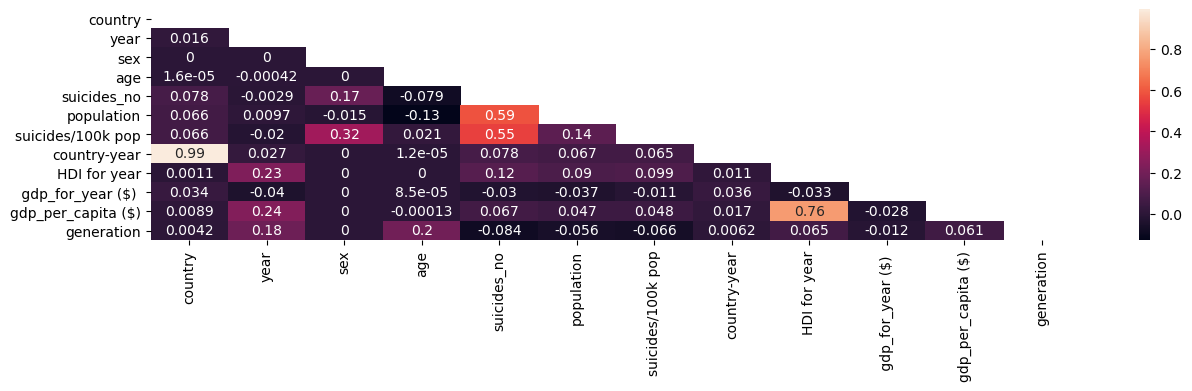

In [175]:
plt.figure(figsize=(15,3))
mask = np.triu(np.ones_like(df.corr(method ='kendall'), dtype=bool))
sns.heatmap(df.corr(method ='kendall'),mask=mask,annot=True)
plt.show()

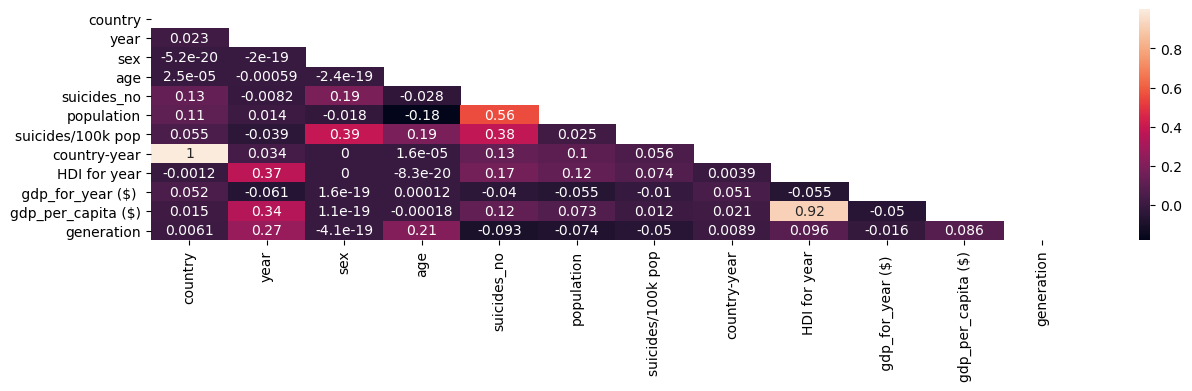

In [176]:
plt.figure(figsize=(15,3))
mask = np.triu(np.ones_like(df.corr(method ='pearson'), dtype=bool))
sns.heatmap(df.corr(method ='pearson'),mask=mask,annot=True)
plt.show()

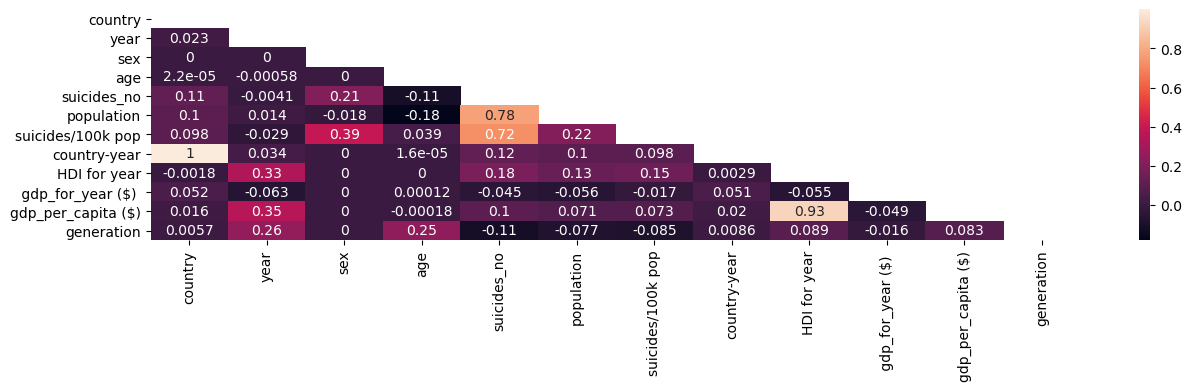

In [177]:
plt.figure(figsize=(15,3))
mask = np.triu(np.ones_like(df.corr(method ='spearman'), dtype=bool))
sns.heatmap(df.corr(method ='spearman'),mask=mask,annot=True)
plt.show()